## Installing Necessary Libraries

In [2]:
!python3 -m pip install matplotlib 

In [3]:
!python3 -m pip install seaborn 

In [4]:
!pip install -r requirements.txt

In [5]:
import predict
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns

In [7]:
# Loading the test dataset
df = pd.read_csv('student_data.csv')
df.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [7]:
df.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


## Distribution of features in the dataset using visualizations

In [8]:
df.columns

Index(['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular',
       'Num Programming Languages', 'Num Past Internships', 'Good Candidate'],
      dtype='object')

/var/folders/25/pvvjr64x0z5c12gllk64jq880000gn/T/ipykernel_1154/1408825379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=custom_palette)


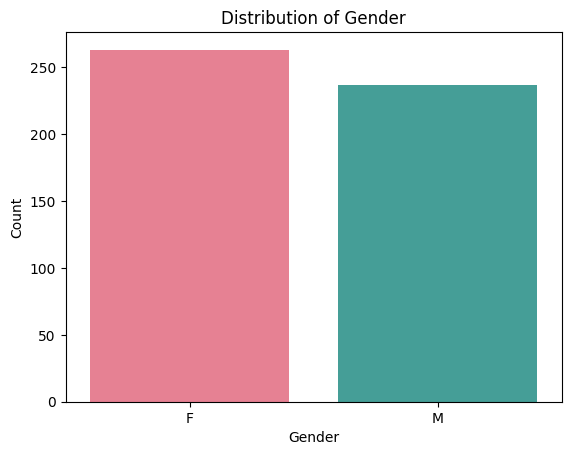

In [52]:
#Gender

custom_palette = sns.color_palette("husl", n_colors=len(df['Gender'].unique()))

# Create the count plot
sns.countplot(x='Gender', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Major')

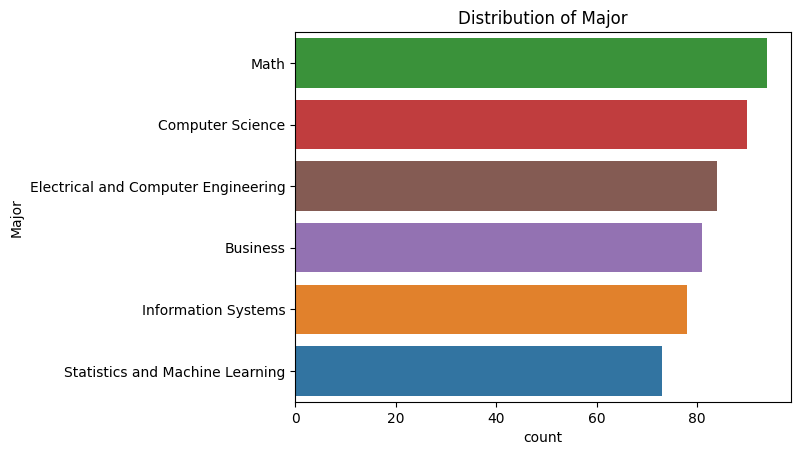

In [31]:

sns.countplot(data = df, y = 'Major', order = df['Major'].value_counts().index, hue = 'Major')
plt.title("Distribution of Major")

<Axes: xlabel='Age', ylabel='Count'>

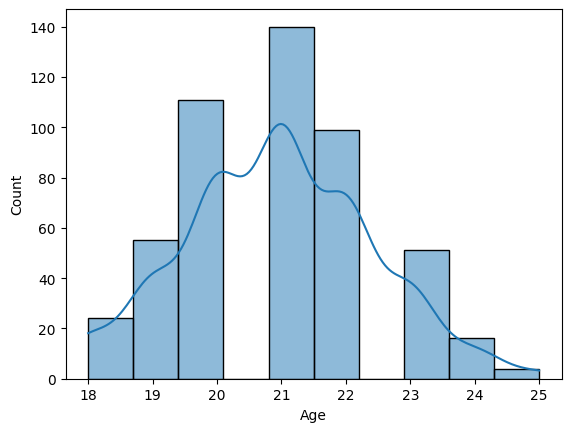

In [8]:
# Age
#df.groupby('Age').size().plot(kind='bar', title='Distribution of Age', ylabel='No. of Students')
sns.histplot(data=df, x="Age", kde=True, bins = 10)

[Text(0.5, 1.0, 'Distribution of GPA')]

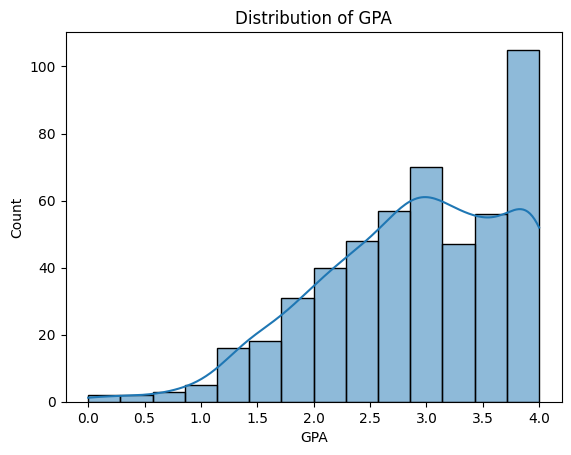

In [22]:
# GPA

sns.histplot(data=df, x="GPA", kde=True).set(title='Distribution of GPA')

Text(0.5, 1.0, 'Distribution of Extra-Curriculars')

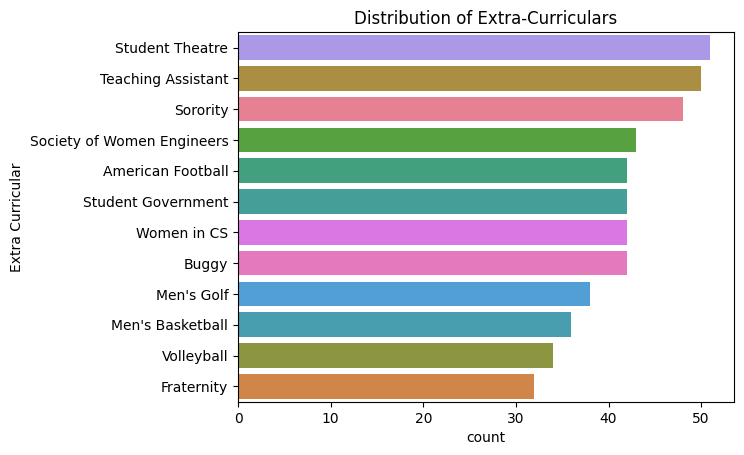

In [27]:
# Extra Curricular
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy','red','pink','orange']


sns.countplot(data = df, y = 'Extra Curricular', order = df['Extra Curricular'].value_counts().index, hue='Extra Curricular')
plt.title("Distribution of Extra-Curriculars")

/var/folders/25/pvvjr64x0z5c12gllk64jq880000gn/T/ipykernel_1154/1277272373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Num Programming Languages', data=df, palette=custom_palette)


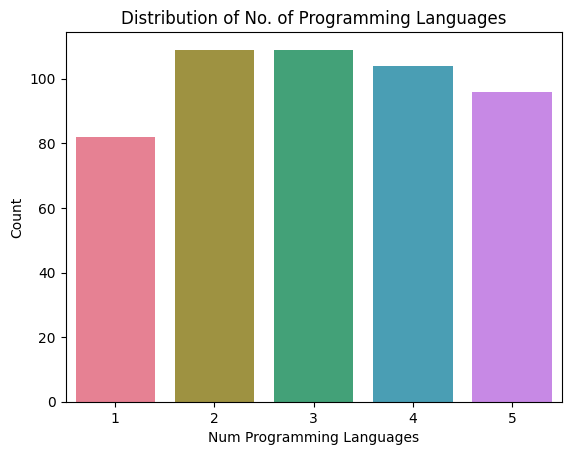

In [35]:
# Programming Languages
custom_palette = sns.color_palette("husl", n_colors=len(df['Num Programming Languages'].unique()))

# Create the count plot
sns.countplot(x='Num Programming Languages', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Num Programming Languages")
plt.ylabel("Count")
plt.title("Distribution of No. of Programming Languages")

# Show the plot
plt.show()

/var/folders/25/pvvjr64x0z5c12gllk64jq880000gn/T/ipykernel_1154/1628466750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Num Past Internships', data=df, palette=custom_palette)


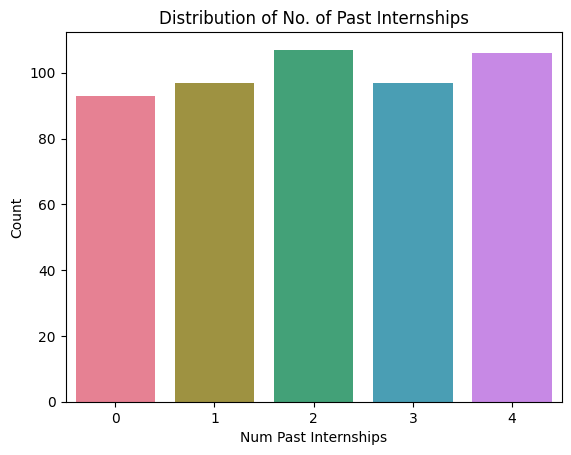

In [39]:
#Past Internships
custom_palette = sns.color_palette("husl", n_colors=len(df['Num Past Internships'].unique()))

# Create the count plot
sns.countplot(x='Num Past Internships', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Num Past Internships")
plt.ylabel("Count")
plt.title("Distribution of No. of Past Internships")

# Show the plot
plt.show()

/var/folders/25/pvvjr64x0z5c12gllk64jq880000gn/T/ipykernel_1154/2427641960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Good Candidate', data=df, palette=custom_palette)


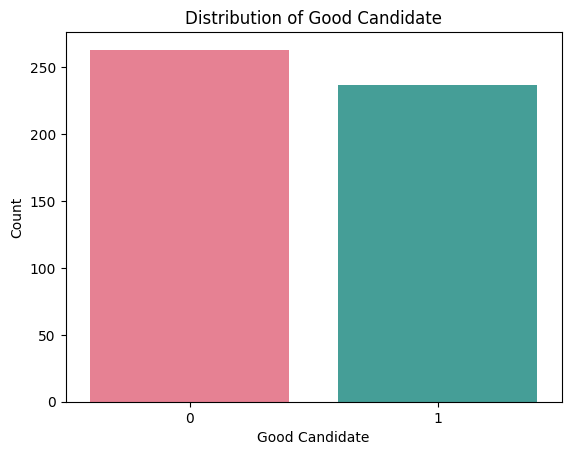

In [41]:
# Good Candidate

custom_palette = sns.color_palette("husl", n_colors=len(df['Good Candidate'].unique()))

# Create the count plot
sns.countplot(x='Good Candidate', data=df, palette=custom_palette)

# Set labels and title
plt.xlabel("Good Candidate")
plt.ylabel("Count")
plt.title("Distribution of Good Candidate")

# Show the plot
plt.show()

## Predicting output of test data using model

In [44]:
#test_df = df.drop(['Good Candidate'], axis=1)
X = df.drop(['Good Candidate'], axis=1)
y = df['Good Candidate']
X.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1
1,1,M,20,Information Systems,2.89,Fraternity,5,3
2,2,F,20,Math,2.66,Teaching Assistant,3,1
3,3,M,20,Information Systems,2.48,Fraternity,5,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1


In [45]:
clf = joblib.load('./model.pkl')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encode',
                                                  OneHotEncoder(), [1, 3])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        n_estimators=1000))])

### Output of test dataset

In [46]:
feature_cols = ['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular',
       'Num Programming Languages', 'Num Past Internships']
y_pred = clf.predict(df[feature_cols])
y_pred = pd.Series(y_pred)
y_pred

0      0
1      1
2      0
3      1
4      0
      ..
495    0
496    1
497    0
498    1
499    0
Length: 500, dtype: int64

In [47]:
y_true = df['Good Candidate']
y_true

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    1
497    0
498    1
499    0
Name: Good Candidate, Length: 500, dtype: int64

### Accuracy

In [48]:
print(f"Test accuracy is {(y_true==y_pred).sum()/y.size:.4f}")

Test accuracy is 0.8320


In [49]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, y_pred)
print("The confusion matrix is")
confusion_matrix

The confusion matrix is


array([[221,  42],
       [ 42, 195]])

### Confusion Matrix

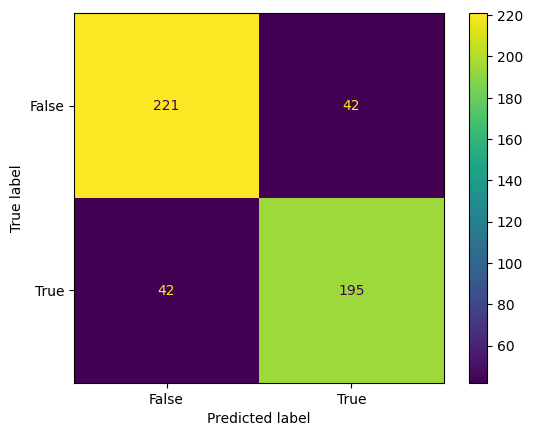

In [50]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()